In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
df = pd.read_csv('C:/Users/Swalllow1219/Desktop/Kaggle_Practice/Data/london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [51]:
df.shape

(17414, 10)

In [52]:
train = df.iloc[:17000, 1:2]
test = df.iloc[17000:17414, 1:2]

In [53]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


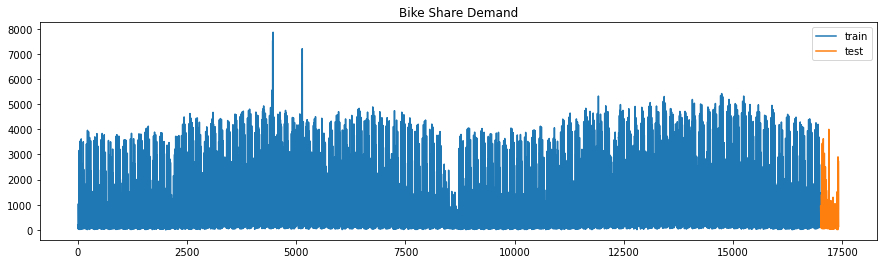

In [54]:
df['cnt'][:17000].plot(figsize=(15,4), legend=True)
df['cnt'][17000:].plot(figsize=(15,4), legend=True)
plt.legend(['train', 'test'])
plt.title('Bike Share Demand')
plt.show()

In [55]:
# pacf = Partial AutoCorrelation / 편자기상관함수
from statsmodels.tsa.stattools import pacf
pacf = pacf(df['cnt'], nlags=20, method='ols')
print(pacf)

[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

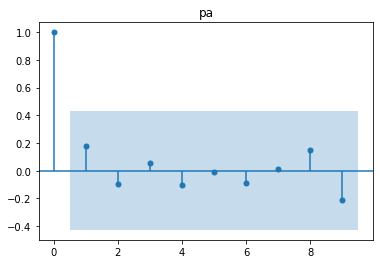

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pacf, lags=9, method='ols', title='pa').show

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [58]:
train_scaled

array([[0.02315522],
       [0.01755725],
       [0.01704835],
       ...,
       [0.17468193],
       [0.16348601],
       [0.14083969]])

In [59]:
x_train = []
y_train = []

for i in range(1, 17000):
    x_train.append(train_scaled[i-1:i, 0])
    y_train.append(train_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [60]:
x_train.shape

(16999, 1)

In [61]:
y_train.shape

(16999,)

In [62]:
# 3차원 배열로 변환
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(16999, 1, 1)

In [63]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN

In [64]:
# RNN Model
rnn = Sequential()
rnn.add(SimpleRNN(activation='relu', units=6, input_shape=(1,1)))
rnn.add(Dense(activation='linear', units=1))

In [65]:
print(rnn.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
rnn.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [67]:
rnn.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
16999/16999 [==============================] - 8s 450us/step - loss: 0.0079 - mse: 0.0079
Epoch 2/10
16999/16999 [==============================] - 8s 444us/step - loss: 0.0077 - mse: 0.0077
Epoch 3/10
16999/16999 [==============================] - 8s 443us/step - loss: 0.0077 - mse: 0.0077
Epoch 4/10
16999/16999 [==============================] - 8s 443us/step - loss: 0.0077 - mse: 0.0077
Epoch 5/10
16999/16999 [==============================] - 8s 442us/step - loss: 0.0077 - mse: 0.0077
Epoch 6/10
16999/16999 [==============================] - 8s 442us/step - loss: 0.0077 - mse: 0.0077
Epoch 7/10
16999/16999 [==============================] - 7s 441us/step - loss: 0.0077 - mse: 0.0077
Epoch 8/10
16999/16999 [==============================] - 8s 444us/step - loss: 0.0076 - mse: 0.0076
Epoch 9/10
16999/16999 [==============================] - 8s 442us/step - loss: 0.0077 - mse: 0.0077
Epoch 10/10
16999/16999 [==============================] - 7s 440us/step - loss: 0.0076 - m

In [68]:
inputs = sc.transform(test)
inputs.shape

(414, 1)

In [69]:
x_test = []
for i in range(1, 415):
    x_test.append(inputs[i-1:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(414, 1, 1)

In [70]:
rnn = rnn.predict(x_test)
rnn = sc.inverse_transform(rnn)

In [71]:
test1 = pd.DataFrame(test)
rnn = pd.DataFrame(rnn)

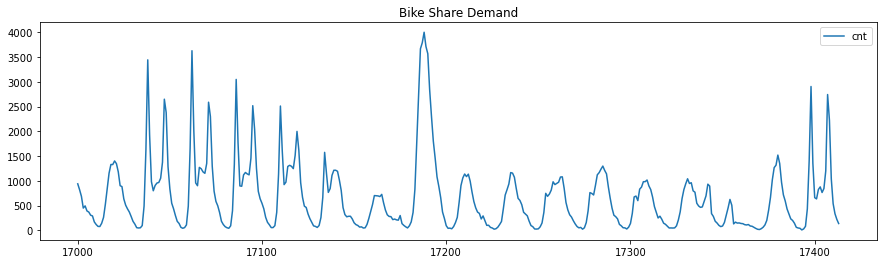

In [72]:
test1.plot(figsize=(15,4), legend=True)
plt.legend(['cnt'])
plt.title('Bike Share Demand')
plt.show()

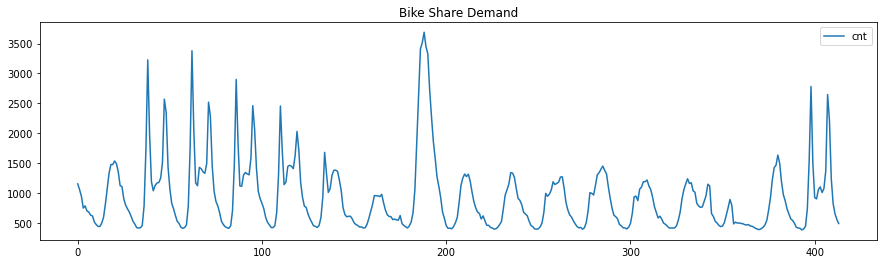

In [73]:
rnn.plot(figsize=(15,4), legend=True)
plt.legend(['cnt'])
plt.title('Bike Share Demand')
plt.show()

In [74]:
test = np.array(test)

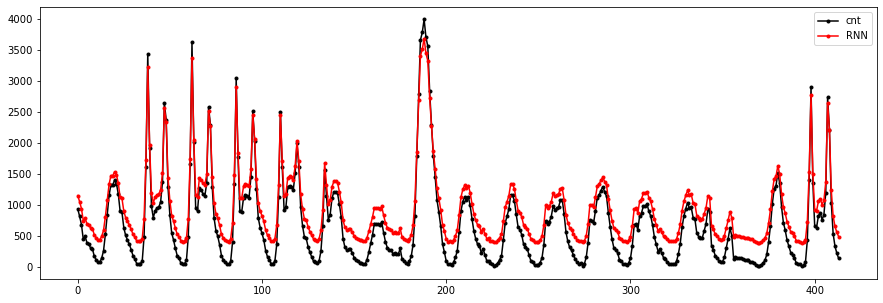

In [75]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker='.', label='RNN', color='red')
plt.legend()

In [76]:
#LSTM Model
from keras.layers.recurrent import LSTM
lstm = Sequential()
lstm.add(LSTM(units=6, activation='relu', input_shape=(1,1)))
lstm.add(Dense(units=1, activation='linear'))

In [77]:
print(lstm.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6)                 192       
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
lstm.compile(loss='mse', optimizer='adam', metrics=['mse'])
lstm.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
16999/16999 [==============================] - 10s 566us/step - loss: 0.0089 - mse: 0.0089
Epoch 2/10
16999/16999 [==============================] - 10s 582us/step - loss: 0.0075 - mse: 0.0075
Epoch 3/10
16999/16999 [==============================] - 10s 583us/step - loss: 0.0071 - mse: 0.0071
Epoch 4/10
16999/16999 [==============================] - 10s 599us/step - loss: 0.0069 - mse: 0.0069
Epoch 5/10
16999/16999 [==============================] - 10s 598us/step - loss: 0.0069 - mse: 0.0069
Epoch 6/10
16999/16999 [==============================] - 10s 592us/step - loss: 0.0068 - mse: 0.0068
Epoch 7/10
16999/16999 [==============================] - 10s 592us/step - loss: 0.0068 - mse: 0.0068
Epoch 8/10
16999/16999 [==============================] - 10s 601us/step - loss: 0.0068 - mse: 0.0068
Epoch 9/10
16999/16999 [==============================] - 10s 599us/step - loss: 0.0068 - mse: 0.0068
Epoch 10/10
16999/16999 [==============================] - 10s 589us/step - loss: 

In [79]:
lstm = lstm.predict(x_test)
lstm = sc.inverse_transform(lstm)

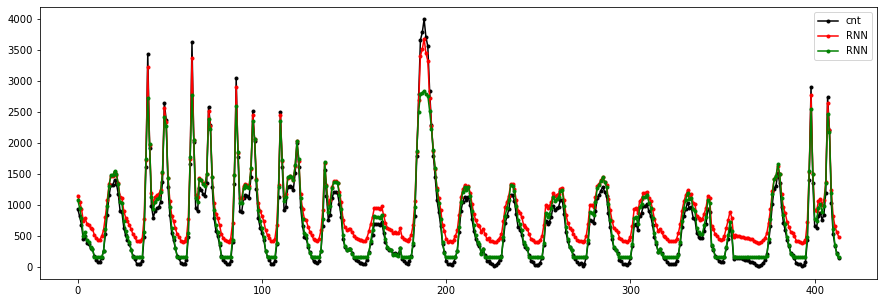

In [80]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker='.', label='RNN', color='red')
plt.plot(lstm, marker='.', label='RNN', color='green')
plt.legend()

In [91]:
# GRU Model
from keras.layers.recurrent import GRU

gru = Sequential()
gru.add(GRU(units=6, activation='relu', input_shape=(1,1)))
gru.add(Dense(units=1, activation='linear'))

In [92]:
print(gru.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 6)                 144       
                                                                 
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
gru.compile(loss='mse', optimizer='adam', metrics=['mse'])
gru.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
16999/16999 [==============================] - 10s 582us/step - loss: 0.0076 - mse: 0.0076
Epoch 2/10
16999/16999 [==============================] - 10s 590us/step - loss: 0.0068 - mse: 0.0068
Epoch 3/10
16999/16999 [==============================] - 10s 590us/step - loss: 0.0068 - mse: 0.0068
Epoch 4/10
16999/16999 [==============================] - 10s 588us/step - loss: 0.0068 - mse: 0.0068
Epoch 5/10
16999/16999 [==============================] - 10s 584us/step - loss: 0.0068 - mse: 0.0068
Epoch 6/10
16999/16999 [==============================] - 10s 589us/step - loss: 0.0068 - mse: 0.0068
Epoch 7/10
16999/16999 [==============================] - 10s 592us/step - loss: 0.0068 - mse: 0.0068
Epoch 8/10
16999/16999 [==============================] - 10s 588us/step - loss: 0.0068 - mse: 0.0068
Epoch 9/10
16999/16999 [==============================] - 10s 579us/step - loss: 0.0068 - mse: 0.0068
Epoch 10/10
16999/16999 [==============================] - 10s 581us/step - loss: 

In [94]:
gru = gru.predict(x_test)
gru = sc.inverse_transform(gru)

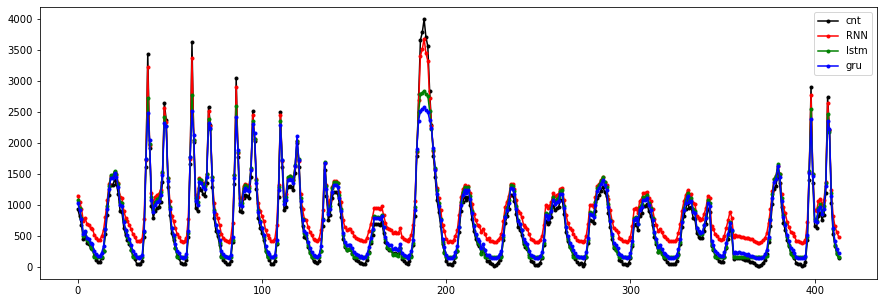

In [95]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker='.', label='RNN', color='red')
plt.plot(lstm, marker='.', label='lstm', color='green')
plt.plot(gru, marker='.', label='gru', color='blue')
plt.legend()

In [96]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [97]:
print("RNN  RMSE : ", RMSE(test, rnn))
print("LSTM RMSE : ", RMSE(test, lstm))
print("GRU  RMSE : ", RMSE(test, gru))

RNN  RMSE :  286.3740029891653
LSTM RMSE :  160.48673355575374
GRU  RMSE :  187.3000582785241
